In [ ]:
#Import necessary library packages for renaming..
import os
import pandas as pd
from google.colab import drive
from google.colab import files

In [ ]:
#List files presently occupying the given folder.
os.listdir("/content/drive/MyDrive/Acadia University Files/2023 24/Winter Semester/COMP-3503/PreparedData/train/DR")

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Acadia University Files/2023 24/Winter Semester/COMP-3503/PreparedData/train/DR'

In [ ]:
#Iterating over the list and renaming each file in accordance with the naming naming convention: NoDr_<count>.jpg OR DR_<count>.jpg

#NOTE: USING os.rename() WHEN USING A DIFFERENT DESTINATION (dst) WILL RELOCATE EXISTING FILE, NOT CREATE A COPY.
#NOTE2: ENSURE THAT SOURCE PATH (src_path), DESTINATION PATH (dst_path), and DESTINATION FILE PATH (dst) ARE ALL CONSISTENT WITH DESIRED DIRECTORIES.

src_path = "/content/drive/MyDrive/Acadia University Files/2023 24/Winter Semester/COMP-3503/PreparedData/valid/No_DR"
dst_path = "/content/drive/MyDrive/Acadia University Files/2023 24/Winter Semester/COMP-3503/PreparedData2/valid/"

count = len(os.listdir("/content/drive/MyDrive/Acadia University Files/2023 24/Winter Semester/COMP-3503/PreparedData2/train")) + len(os.listdir("/content/drive/MyDrive/Acadia University Files/2023 24/Winter Semester/COMP-3503/PreparedData2/test")) + len(os.listdir("/content/drive/MyDrive/Acadia University Files/2023 24/Winter Semester/COMP-3503/PreparedData2/valid")) #Ensures the avoidance of duplicate id numbers.

for file in os.listdir(src_path):
  src = src_path + "/" + file
  dst = dst_path + "NoDR_" + str(count) + ".jpg"

  os.rename(src, dst)
  count += 1

print("Files successfully renamed.")

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Acadia University Files/2023 24/Winter Semester/COMP-3503/PreparedData/valid/No_DR'

In [ ]:
#Ensuring correct total number of files has been transferred.
print(len(os.listdir("/content/drive/MyDrive/Acadia University Files/2023 24/Winter Semester/COMP-3503/PreparedData2/valid")))

531


In [ ]:
#Splitting training file names into DR presence, and ID number.
drp_list = []
name_list = []
for file in os.listdir("/content/drive/MyDrive/Acadia University Files/2023 24/Winter Semester/COMP-3503/PreparedData2/train"):
  dr_presence = file.split("_")[0]

  if(dr_presence == "NoDR"):
    dr_presence = 0;
  elif(dr_presence == "DR"):
    dr_presence = 1;

  drp_list.append(dr_presence)
  name_list.append(file)

print(drp_list)
print(name_list)

#Creating Pandas DataFrame and storing IDs and if DR is present in each of the stored instances.
trainDf = pd.DataFrame(
    {"fileName":name_list,
     "DR?":drp_list
     })

print(trainDf)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
#Import necessary library packages for CNN modeling.
import numpy as np

#For image loading
from skimage.io import imread
import matplotlib.pyplot as plt

#For evaluating the model
from sklearn.metrics import accuracy_score
from tqdm import tqdm

#PyTorch libraries and modules
import torch
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD

In [ ]:
#Loading images
train_img = []

for fileName in tqdm(trainDf["fileName"]):
  image_path = "/content/drive/MyDrive/Acadia University Files/2023 24/Winter Semester/COMP-3503/PreparedData2/train" + "/" + str(fileName)

  image = imread(image_path)
  train_img.append(image)

100%|██████████| 2076/2076 [00:55<00:00, 37.43it/s] 


In [ ]:
#Converting the list to a Numpy array.
train_x = np.array(train_img)
train_y = trainDf["DR?"].values
train_x.shape

(2076, 224, 224)

(<Axes: >, <matplotlib.image.AxesImage at 0x7a13e8779120>)

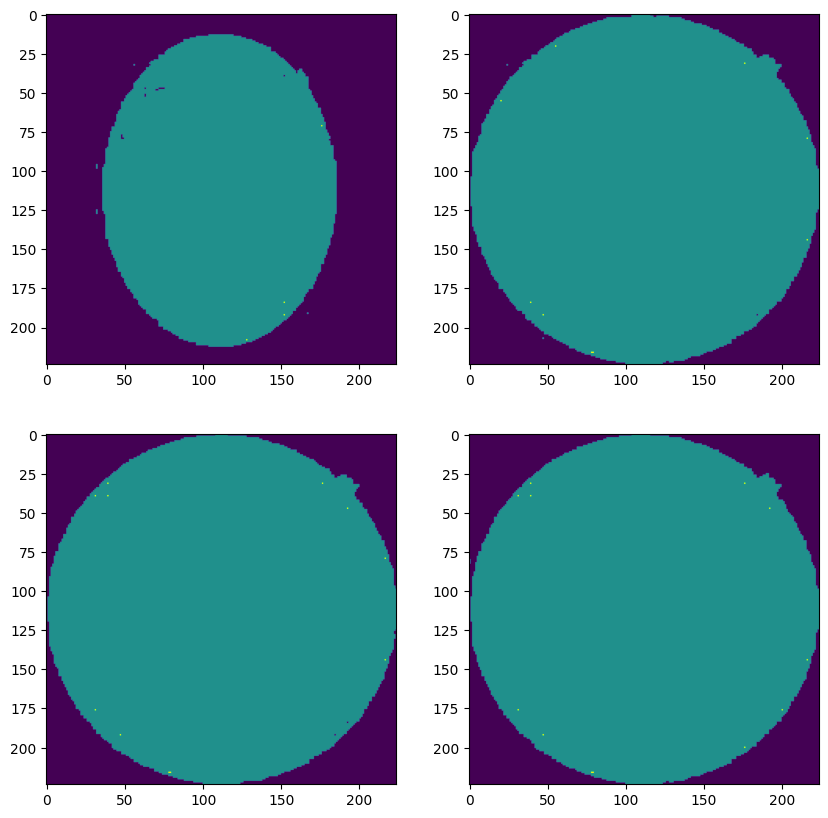

In [ ]:
#Visualizing some images.
i = 0
plt.figure(figsize=(10,10))
plt.subplot(221), plt.imshow(train_x[i])
plt.subplot(222), plt.imshow(train_x[i+25])
plt.subplot(223), plt.imshow(train_x[i+50])
plt.subplot(224), plt.imshow(train_x[i+75])

In [ ]:
#Converting training images into PyTorch format.
train_x = train_x.reshape(2076, 1, 224, 224)
train_x = torch.from_numpy(train_x)

#Converting target into PyTorch format
train_y = train_y.astype(int)
train_y = torch.from_numpy(train_y)

#Shape of training data
train_x.shape, train_y.shape

(torch.Size([2076, 1, 224, 224]), torch.Size([2076]))

In [ ]:
#Implementing CNN architecture.
class Net(Module):
  def __init__(self):
      super(Net, self).__init__()

      self.cnn_layers = Sequential(
          #Defining a 2D convolution layer
          Conv2d(1, 4, kernel_size = 3, stride = 1, padding = 1),
          BatchNorm2d(4),
          ReLU(inplace=True),
          MaxPool2d(kernel_size = 2, stride = 2),

          #Defining another 2D convolution layer
          Conv2d(4, 4, kernel_size = 3, stride = 1, padding = 1),
          BatchNorm2d(4),
          ReLU(inplace = True),
          MaxPool2d(kernel_size = 2, stride = 2)
      )

      self.linear_layers = Sequential(
          Linear(4 * 7 * 7, 10)
      )

  #Defining the forward pass function.
  def forward(self, x):
      x = self.cnn_layers(x)
      x = x.view(x.size(0), -1)
      x = self.linear_layers(x)
      return x

In [ ]:
#Defining CNN model.
model = Net()

#Optimizer.
optimizer = Adam(model.parameters(), lr=0.07)

#Loss function.
criterion = CrossEntropyLoss()

#Checking is GPU is available.
if torch.cuda.is_available():
  model = model.cuda()
  criterion = criterion.cuda()

print(model)

Net(
  (cnn_layers): Sequential(
    (0): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(4, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_layers): Sequential(
    (0): Linear(in_features=196, out_features=10, bias=True)
  )
)


In [ ]:
#Training function.
def train(epoch):
  model.train()

  #Fetching training set.
  x_train, y_train = Variable(train_x), Variable(train_y)

  #Getting validation set (WILL BE CREATED)

  #Converting data to GPU format.
  if torch.cuda.is_available():
    x_train = x_train.cuda()
    y_train = y_train.cuda()
    #Validation sets here as well.

  #Clearing gradients.
  optimizer.zero_grad()

  #Prediction for training set (and validation set, once created).
  output_train = model(x_train)

  #Computing training (and validation) loss.
  loss_train = criterion(output_train)
  train_losses.append(loss_train)

  #Computing updated weights of all model parameters.
  loss_train.backward()
  optimizer.step()
  tr_loss = loss_train.item()

In [ ]:
#Defining epochs.
n_epochs = 25

#Training losses list.
train_losses = []
#Repeat for validation losses list.

#Training the model.
for epoch in range(n_epochs):
  train(epoch)

RuntimeError: Input type (unsigned char) and bias type (float) should be the same

In [ ]:
print(model.cnn_layers[0].bias.dtype)
print(model.cnn_layers[0].weight.dtype)

torch.float32
torch.float32
